In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('GK.csv')

In [3]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,G. Singh Sandhu,Gurpreet Singh Sandhu,63,64,350000,GK,GK,India,https://cdn.sofifa.net/players/225/213/23_60.png,30,...,29,30,29,29,30,29,28,29,28,64
1,A. Singh,Amrinder Singh,61,63,275000,GK,GK,India,https://cdn.sofifa.net/players/223/760/23_60.png,29,...,30,29,30,29,29,29,28,28,28,62
2,A. Bhattacharya,Arindam Bhattacharya,61,61,160000,GK,GK,India,https://cdn.sofifa.net/players/193/913/23_60.png,32,...,31,38,31,29,34,29,27,28,27,61
3,T. Rehenesh,TP Rehenesh,60,61,190000,GK,GK,India,https://cdn.sofifa.net/players/248/325/23_60.png,29,...,22,22,22,22,22,22,22,23,22,61
4,L. Kattimani,Laxmikant Kattimani,59,59,70000,GK,GK,India,https://cdn.sofifa.net/players/217/231/23_60.png,33,...,26,24,26,25,25,25,25,26,25,59


In [4]:
len(df)
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Known As          0
Full Name         0
Overall           0
Potential         0
Value(in Euro)    0
                 ..
RWB Rating        0
LB Rating         0
CB Rating         0
RB Rating         0
GK Rating         0
Length: 89, dtype: int64


In [5]:
num_duplicates = df.duplicated().sum()

print("Number of duplicated values in the dataset:", num_duplicates)

Number of duplicated values in the dataset: 0


In [6]:
X = df[['Potential','Pace Total','Shooting Total','Passing Total','Physicality Total','Reactions','Jumping','Strength','Goalkeeper Diving','Goalkeeper Handling',' GoalkeeperKicking','Goalkeeper Positioning','Goalkeeper Reflexes','GK Rating']]


In [8]:
correlation_matrix = X.corr()
print(correlation_matrix)

                        Potential  Pace Total  Shooting Total  Passing Total  \
Potential                1.000000    0.316830        0.029420       0.187718   
Pace Total               0.316830    1.000000        0.705883       0.602620   
Shooting Total           0.029420    0.705883        1.000000       0.636521   
Passing Total            0.187718    0.602620        0.636521       1.000000   
Physicality Total        0.216605    0.745335        0.545341       0.714975   
Reactions               -0.006605    0.515981        0.373604       0.539574   
Jumping                 -0.034395    0.067845        0.084262       0.013994   
Strength                 0.131978    0.301924        0.327862       0.365693   
Goalkeeper Diving        0.316830    1.000000        0.705883       0.602620   
Goalkeeper Handling      0.029420    0.705883        1.000000       0.636521   
 GoalkeeperKicking       0.187718    0.602620        0.636521       1.000000   
Goalkeeper Positioning   0.216605    0.7

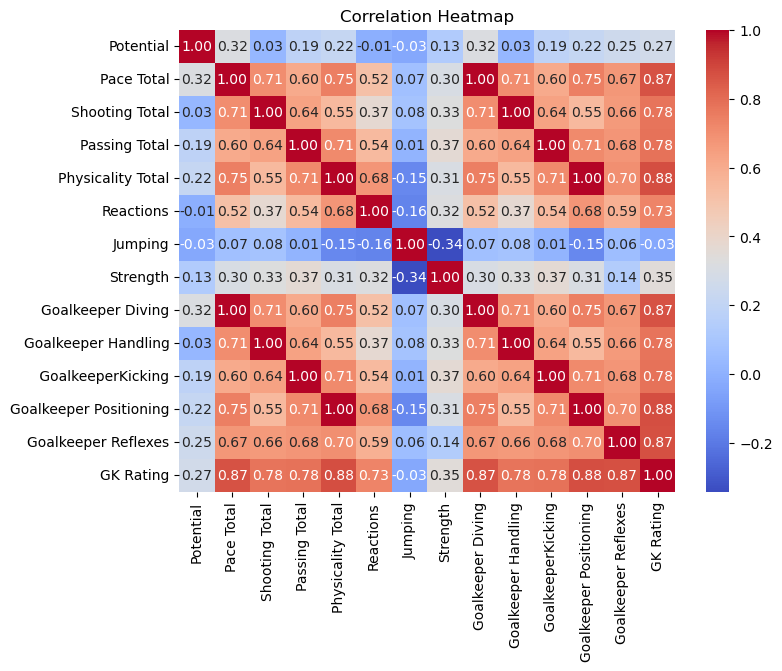

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# RandomForest

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



# Define features (X) and target variable (y)
X = df[['Potential','Pace Total','Shooting Total','Passing Total','Physicality Total','Reactions','Jumping','Strength','Goalkeeper Diving','Goalkeeper Handling',' GoalkeeperKicking','Goalkeeper Positioning','Goalkeeper Reflexes','GK Rating']]
y = df['Overall']  # Target variable

# Split the data into training and testing sets (adjust test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Initialize the model (Random Forest Regression as an example)
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print("All predicted values:")
print(y_pred)

All predicted values:
[53.81 51.67 59.67 48.88]


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.06707499999999908
R-squared: 0.9958563706563707


In [7]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As          T. Rehenesh
Full Name         TP Rehenesh
Overall                    60
Potential                  61
Value(in Euro)         190000
                     ...     
RWB Rating                 22
LB Rating                  22
CB Rating                  23
RB Rating                  22
GK Rating                  61
Name: 3, Length: 89, dtype: object


In [8]:
# Find the indices of the top 3 highest predicted overall values
top_3_indices = y_pred.argsort()[-3:][::-1]

# Retrieve and print details of the top 3 players with the highest predicted overall value
print("Details of the top 3 players with the highest predicted overall value:")
for index in top_3_indices:
    player_details = df.iloc[X_test.index[index]]
    print(player_details)

Details of the top 3 players with the highest predicted overall value:
Known As          T. Rehenesh
Full Name         TP Rehenesh
Overall                    60
Potential                  61
Value(in Euro)         190000
                     ...     
RWB Rating                 22
LB Rating                  22
CB Rating                  23
RB Rating                  22
GK Rating                  61
Name: 3, Length: 89, dtype: object
Known As               M. Michu
Full Name         Mirshad Michu
Overall                      54
Potential                    56
Value(in Euro)            90000
                      ...      
RWB Rating                   20
LB Rating                    19
CB Rating                    20
RB Rating                    19
GK Rating                    55
Name: 14, Length: 89, dtype: object
Known As                K. Singh
Full Name         Karanjit Singh
Overall                       52
Potential                     52
Value(in Euro)              9000
           

In [9]:
y_pred = model.predict(X_test)

# Find the index of the lowest predicted overall value
lowest_index = y_pred.argmin()

# Retrieve the details of the player with the lowest predicted overall value
lowest_player_details = df.iloc[X_test.index[lowest_index]]

# Print details of the player with the lowest predicted overall value
print("Details of the player with the lowest predicted overall value:")
print(lowest_player_details)

Details of the player with the lowest predicted overall value:
Known As              S. Padattil
Full Name         Sharon Padattil
Overall                        49
Potential                      58
Value(in Euro)              90000
                       ...       
RWB Rating                     18
LB Rating                      18
CB Rating                      21
RB Rating                      18
GK Rating                      50
Name: 29, Length: 89, dtype: object


In [10]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Find the index of the highest predicted overall value among Indian players
    highest_indian_index = indian_players_predictions.argmax()

    # Retrieve the index of the player with the highest predicted overall value among Indian players
    index_in_indian_players = indian_players_indices[highest_indian_index]

    # Retrieve the details of the Indian player with the highest predicted overall value
    highest_indian_player_details = df.iloc[index_in_indian_players]

    # Print details of the Indian player with the highest predicted overall value
    print("Details of the Indian player with the highest predicted overall value:")
    print(highest_indian_player_details)
else:
    print("No Indian players in the test set.")

Details of the Indian player with the highest predicted overall value:
Known As               A. Bhattacharya
Full Name         Arindam Bhattacharya
Overall                             61
Potential                           61
Value(in Euro)                  160000
                          ...         
RWB Rating                          29
LB Rating                           27
CB Rating                           28
RB Rating                           27
GK Rating                           61
Name: 2, Length: 89, dtype: object


In [11]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:3]

    # Retrieve the indices of the top three players among Indian players
    top_three_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top three Indian players with the highest predicted overall value
    top_three_indian_players = df.iloc[top_three_indices]

    # Print details of the top three Indian players with the highest predicted overall value
    print("Details of the top three Indian players with the highest predicted overall value:")
    print(top_three_indian_players)
else:
    print("No Indian players in the test set.")



Details of the top three Indian players with the highest predicted overall value:
          Known As              Full Name  Overall  Potential  Value(in Euro)  \
2  A. Bhattacharya   Arindam Bhattacharya       61         61          160000   
0  G. Singh Sandhu  Gurpreet Singh Sandhu       63         64          350000   
1         A. Singh         Amrinder Singh       61         63          275000   

  Positions Played Best Position Nationality  \
2               GK            GK       India   
0               GK            GK       India   
1               GK            GK       India   

                                         Image Link  Age  ...  LM Rating  \
2  https://cdn.sofifa.net/players/193/913/23_60.png   32  ...         31   
0  https://cdn.sofifa.net/players/225/213/23_60.png   30  ...         29   
1  https://cdn.sofifa.net/players/223/760/23_60.png   29  ...         30   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
2         38         3

# LinearRegression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test)

print("All predicted values:")
print(y_pred)


All predicted values:
[54.11428128 52.22133433 59.96024333 48.9811896  48.0983939  49.92996474]


In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# To print coefficients and intercept
print("Coefficients:", linear_reg.coef_)
print("Intercept:", linear_reg.intercept_)

Mean Squared Error: 0.013094969410378991
R-squared: 0.9991886077473775
Coefficients: [-0.04521597  0.05769387  0.05258495  0.01479164  0.06659214  0.04650555
 -0.01029226  0.00302446  0.05769387  0.05258495  0.01479164  0.06659214
  0.12984578  0.46277836]
Intercept: 2.091205647959569


In [14]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As          T. Rehenesh
Full Name         TP Rehenesh
Overall                    60
Potential                  61
Value(in Euro)         190000
                     ...     
RWB Rating                 22
LB Rating                  22
CB Rating                  23
RB Rating                  22
GK Rating                  61
Name: 3, Length: 89, dtype: object


In [15]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:3]

    # Retrieve the indices of the top three players among Indian players
    top_three_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top three Indian players with the highest predicted overall value
    top_three_indian_players = df.iloc[top_three_indices]

    # Print details of the top three Indian players with the highest predicted overall value
    print("Details of the top three Indian players with the highest predicted overall value:")
    print(top_three_indian_players)
else:
    print("No Indian players in the test set.")


Details of the top three Indian players with the highest predicted overall value:
          Known As              Full Name  Overall  Potential  Value(in Euro)  \
2  A. Bhattacharya   Arindam Bhattacharya       61         61          160000   
0  G. Singh Sandhu  Gurpreet Singh Sandhu       63         64          350000   
1         A. Singh         Amrinder Singh       61         63          275000   

  Positions Played Best Position Nationality  \
2               GK            GK       India   
0               GK            GK       India   
1               GK            GK       India   

                                         Image Link  Age  ...  LM Rating  \
2  https://cdn.sofifa.net/players/193/913/23_60.png   32  ...         31   
0  https://cdn.sofifa.net/players/225/213/23_60.png   30  ...         29   
1  https://cdn.sofifa.net/players/223/760/23_60.png   29  ...         30   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
2         38         3

# DecisionTree

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the decision tree regressor model
tree_reg = DecisionTreeRegressor()

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[50. 54. 50. 53. 54. 49.]


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.16666666666666666
R-squared: 0.9574468085106383


In [18]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As              P. Lachenpa
Full Name         Phurba Lachenpa
Overall                        54
Potential                      62
Value(in Euro)             210000
                       ...       
RWB Rating                     20
LB Rating                      20
CB Rating                      21
RB Rating                      20
GK Rating                      55
Name: 13, Length: 89, dtype: object


In [19]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:3]

    # Retrieve the indices of the top three players among Indian players
    top_three_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top three Indian players with the highest predicted overall value
    top_three_indian_players = df.iloc[top_three_indices]

    # Print details of the top three Indian players with the highest predicted overall value
    print("Details of the top three Indian players with the highest predicted overall value:")
    print(top_three_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top three Indian players with the highest predicted overall value:
       Known As            Full Name  Overall  Potential  Value(in Euro)  \
1      A. Singh       Amrinder Singh       61         63          275000   
4  L. Kattimani  Laxmikant Kattimani       59         59           70000   
3   T. Rehenesh          TP Rehenesh       60         61          190000   

  Positions Played Best Position Nationality  \
1               GK            GK       India   
4               GK            GK       India   
3               GK            GK       India   

                                         Image Link  Age  ...  LM Rating  \
1  https://cdn.sofifa.net/players/223/760/23_60.png   29  ...         30   
4  https://cdn.sofifa.net/players/217/231/23_60.png   33  ...         26   
3  https://cdn.sofifa.net/players/248/325/23_60.png   29  ...         22   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
1         29         30          29       

# Support Vector Regression

In [20]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Initialize the Support Vector Machine for Regression (SVR) model
svm_reg = SVR(kernel='rbf')  # 'rbf' kernel is often used for non-linear relationships

# Fit the model to the training data
svm_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[50.3575421  53.05527505 50.91106242 52.05702289 53.84108648 50.04805413]


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.4962164838603147
R-squared: 0.8733064296526856


In [22]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As               G. Singh
Full Name         Gurmeet Singh
Overall                      54
Potential                    64
Value(in Euro)           210000
                      ...      
RWB Rating                   19
LB Rating                    19
CB Rating                    21
RB Rating                    19
GK Rating                    55
Name: 15, Length: 89, dtype: object


In [23]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:3]

    # Retrieve the indices of the top three players among Indian players
    top_three_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top three Indian players with the highest predicted overall value
    top_three_indian_players = df.iloc[top_three_indices]

    # Print details of the top three Indian players with the highest predicted overall value
    print("Details of the top three Indian players with the highest predicted overall value:")
    print(top_three_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top three Indian players with the highest predicted overall value:
       Known As            Full Name  Overall  Potential  Value(in Euro)  \
4  L. Kattimani  Laxmikant Kattimani       59         59           70000   
1      A. Singh       Amrinder Singh       61         63          275000   
3   T. Rehenesh          TP Rehenesh       60         61          190000   

  Positions Played Best Position Nationality  \
4               GK            GK       India   
1               GK            GK       India   
3               GK            GK       India   

                                         Image Link  Age  ...  LM Rating  \
4  https://cdn.sofifa.net/players/217/231/23_60.png   33  ...         26   
1  https://cdn.sofifa.net/players/223/760/23_60.png   29  ...         30   
3  https://cdn.sofifa.net/players/248/325/23_60.png   29  ...         22   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
4         24         26          25       

# K-Nearest Neighbors (KNN)

In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# Initialize the KNN regressor model (with, for instance, k=5 neighbors)
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_reg.predict(X_test)

# Print all predicted values
print("All predicted values:")
print(y_pred)


All predicted values:
[48.6 52.2 53.4 50.4 50.8 54. ]


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.19333333333333222
R-squared: 0.9400000000000004


In [26]:
# Find the index of the highest predicted overall value
highest_index = y_pred.argmax()

# Retrieve the details of the player with the highest predicted overall value
highest_player_details = df.iloc[X_test.index[highest_index]]

# Print details of the player with the highest predicted overall value
print("Details of the player with the highest predicted overall value:")
print(highest_player_details)

Details of the player with the highest predicted overall value:
Known As               G. Singh
Full Name         Gurmeet Singh
Overall                      54
Potential                    64
Value(in Euro)           210000
                      ...      
RWB Rating                   19
LB Rating                    19
CB Rating                    21
RB Rating                    19
GK Rating                    55
Name: 15, Length: 89, dtype: object


In [27]:
# Filter the original dataframe for Indian players
indian_players_df = df[df['Nationality'] == 'India']

# Get the indices of Indian players in the original dataframe
indian_players_indices = indian_players_df.index.tolist()

# Filter the predictions to only include Indian players from the test set
indian_players_predictions = y_pred[X_test.index.isin(indian_players_indices)]

if len(indian_players_predictions) > 0:
    # Sort the Indian players' predictions and indices in descending order
    sorted_indices = sorted(range(len(indian_players_predictions)), key=lambda i: indian_players_predictions[i], reverse=True)[:3]

    # Retrieve the indices of the top three players among Indian players
    top_three_indices = [indian_players_indices[i] for i in sorted_indices]

    # Retrieve the details of the top three Indian players with the highest predicted overall value
    top_three_indian_players = df.iloc[top_three_indices]

    # Print details of the top three Indian players with the highest predicted overall value
    print("Details of the top three Indian players with the highest predicted overall value:")
    print(top_three_indian_players)
else:
    print("No Indian players in the test set.")

Details of the top three Indian players with the highest predicted overall value:
          Known As             Full Name  Overall  Potential  Value(in Euro)  \
5         V. Kaith          Vishal Kaith       57         60          170000   
2  A. Bhattacharya  Arindam Bhattacharya       61         61          160000   
1         A. Singh        Amrinder Singh       61         63          275000   

  Positions Played Best Position Nationality  \
5               GK            GK       India   
2               GK            GK       India   
1               GK            GK       India   

                                         Image Link  Age  ...  LM Rating  \
5  https://cdn.sofifa.net/players/245/164/23_60.png   25  ...         21   
2  https://cdn.sofifa.net/players/193/913/23_60.png   32  ...         31   
1  https://cdn.sofifa.net/players/223/760/23_60.png   29  ...         30   

   CM Rating  RM Rating  LWB Rating CDM Rating  RWB Rating  LB Rating  \
5         21         21   